In [ ]:
import sys
sys.path.append("../../src")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from exact_solution import solve_master_equation, one_excited_emitter_state


# Jaqal version

In [ ]:
runs = [
    np.load(file, allow_pickle=True) for file in (
        '../QSCOUT/UCDavis_11_11_24_AllCodes/original_all_probs_0.npy',
        '../QSCOUT/UCDavis_11_11_24_AllCodes/original_all_probs_1.npy',
        '../QSCOUT/UCDavis_11_11_24_AllCodes/original_all_probs_2.npy',
        '../QSCOUT/UCDavis_11_11_24_AllCodes/original_all_probs_3.npy',
    )
]

# indices into each timestep results
states = {
    "|1000>": 1,
    "|0100>": 2,
    "|0010>": 4,
    "|0001>": 8,
}

data = sum([pd.DataFrame({k: [row[v] for row in run] for k, v in states.items()}) for run in runs]) / len(runs)
data = data.divide(data.sum(axis=1), axis=0)

In [66]:
N = 3
g = 4
kappa = 2
times = np.linspace(0, 3, 51)

# qiskit_results = run_qmarina_on_simulator(N, g, kappa, times)
initial_state = one_excited_emitter_state(N, 1)
qutip_results = solve_master_equation(N, g, kappa, initial_state, times)

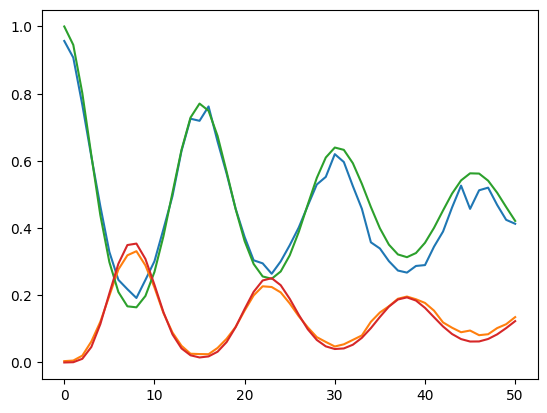

In [67]:
plt.plot(data["|1000>"], label="Emitter 1")
plt.plot((data["|0100>"] + data["|0010>"])/2, label="Emitter 2 & 3")

plt.plot(qutip_results["Emitter 1"].tolist())
plt.plot(qutip_results["Emitter 2"].tolist())

# Superstaq

In [63]:
runs = [
    np.load(file, allow_pickle=True) for file in (
        '../QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_all_probs_0.npy',
        '../QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_all_probs_1.npy',
        '../QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_all_probs_2.npy',
        '../QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_all_probs_3.npy',
    )
]

# indices into each timestep results
states = {
    "|1000>": 1,
    "|0100>": 2,
    "|0010>": 4,
    "|0001>": 8,
}

data = sum([pd.DataFrame({k: [row[v] for row in run] for k, v in states.items()}) for run in runs]) / len(runs)
data = data.divide(data.sum(axis=1), axis=0)

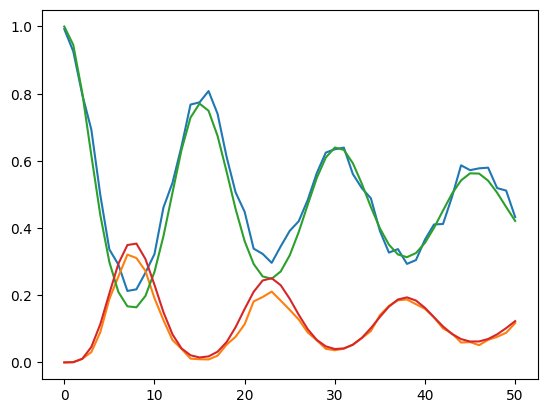

In [64]:
plt.plot(data["|1000>"], label="Emitter 1")
plt.plot((data["|0100>"] + data["|0010>"])/2, label="Emitter 2 & 3")

plt.plot(qutip_results["Emitter 1"].tolist())
plt.plot(qutip_results["Emitter 2"].tolist())

# mirror swaps

In [56]:
runs = [
    np.load(file, allow_pickle=True) for file in (
        '../QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_mswap_all_probs_0.npy',
        '../QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_mswap_all_probs_1.npy',
        '../QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_mswap_all_probs_2.npy',
        '../QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_mswap_all_probs_3.npy',
    )
]

# indices into each timestep results
states = {
    "|1000>": 1,
    "|0100>": 2,
    "|0010>": 4,
    "|0001>": 8,
}

data = sum([pd.DataFrame({k: [row[v] for row in run] for k, v in states.items()}) for run in runs]) / len(runs)
data = data.divide(data.sum(axis=1), axis=0)

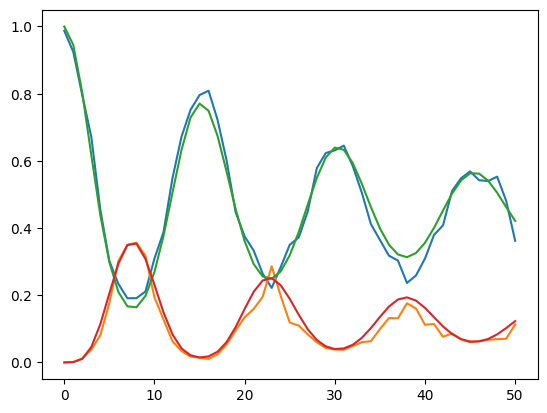

In [61]:
plt.plot(data["|1000>"], label="Emitter 1")
plt.plot((data["|0100>"] + data["|0010>"])/2, label="Emitter 2 & 3")

plt.plot(qutip_results["Emitter 1"].tolist())
plt.plot(qutip_results["Emitter 2"].tolist())

# RC?

In [68]:
runs = [
    np.load(file, allow_pickle=True) for file in (
        '../QSCOUT/UCDavis_11_11_24_AllCodes/rc_all_probs_0.npy',
        '../QSCOUT/UCDavis_11_11_24_AllCodes/rc_all_probs_1.npy',
        '../QSCOUT/UCDavis_11_11_24_AllCodes/rc_all_probs_2.npy',
        '../QSCOUT/UCDavis_11_11_24_AllCodes/rc_all_probs_3.npy',
    )
]

# indices into each timestep results
states = {
    "|1000>": 1,
    "|0100>": 2,
    "|0010>": 4,
    "|0001>": 8,
}

data = sum([pd.DataFrame({k: [row[v] for row in run] for k, v in states.items()}) for run in runs]) / len(runs)
data = data.divide(data.sum(axis=1), axis=0)

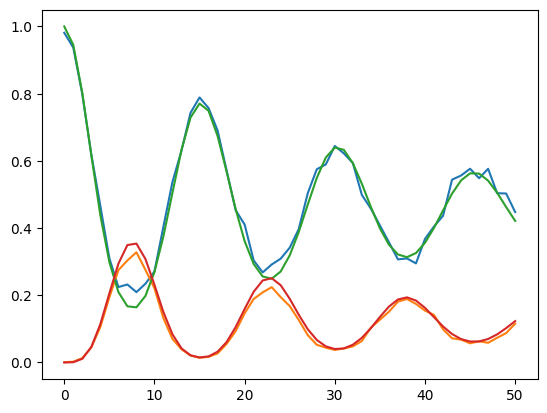

In [69]:
plt.plot(data["|1000>"], label="Emitter 1")
plt.plot((data["|0100>"] + data["|0010>"])/2, label="Emitter 2 & 3")

plt.plot(qutip_results["Emitter 1"].tolist())
plt.plot(qutip_results["Emitter 2"].tolist())